### Set up the Image Directories 

In [10]:
%matplotlib inline
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [3]:
train_path = 'cats_and_dogs/train/'
valid_path = 'cats_and_dogs/valid/'
test_path = 'cats_and_dogs/test/'

In [36]:
train_batches = ImageDataGenerator().flow_from_directory(train_path
                                                         , target_size = (224, 224)
                                                         , classes = ['dog', 'cat']
                                                         , batch_size = 10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path
                                                         , target_size = (224, 224)
                                                         , classes = ['dog', 'cat']
                                                         , batch_size = 4)

test_batches = ImageDataGenerator().flow_from_directory(test_path
                                                         , target_size = (224, 224)
                                                         , classes = ['dog', 'cat']
                                                         , batch_size = 10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [19]:
# https://github.com/kevinbird15/HackerEarthPredictTheHappiness/blob/290dc6988d406c6fc10b872e06d0e144f26e069d/PtH/fastai/plots.py

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3): 
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: 
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [20]:
imgs, labels = next(train_batches)

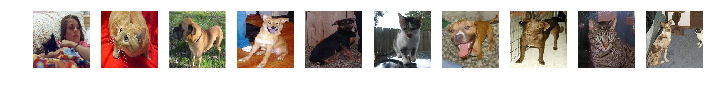

In [21]:
plots(imgs)

### Build and train the CNN

The first layer is a convolution layer since we're dealing with 2D images.

32 is chosen arbitrarily and is the number of output filters in the convolution.
(3, 3) is the kernel size - the width and height of the 2D convolutional window.
224, 224, 3 as the width, height, and number of channels like the TensorFlow backend wants it 

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(), # flattens previous layer output into a 1D tensor
    Dense(2, activation='softmax'), # dense layer with 2 nodes
])

In [31]:
model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit_generator(train_batches
                    , steps_per_epoch = 4 # number of samples / batch size
                    , validation_data = valid_batches
                    , validation_steps = 4 
                    , epochs = 10
                    , verbose = 2)

Epoch 1/10
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


### Predict

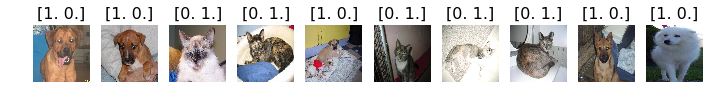

In [42]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [43]:
test_labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [44]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 1., 0., 0., 0., 1., 1.], dtype=float32)

10 samples images, and our batch size is 10, so in the 1 step, it's getting all of the images

In [45]:
predictions = model.predict_generator(test_batches
                                      , steps = 1 
                                      , verbose = 0)

This predicts that it's a cat all of the time ...

In [49]:
predictions

array([[7.1951371e-27, 1.0000000e+00],
       [1.0593635e-12, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [6.0614146e-33, 1.0000000e+00],
       [2.1464860e-30, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.0925763e-37, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [50]:
cm = confusion_matrix(test_labels, predictions[:,0].round())

In [51]:
cm

array([[5, 0],
       [5, 0]])

### Build a VGG16 Model